In [1]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_pickle(r'Sentiment_for_reviews.pkl') #Read dataframe produced from the 'Reviews sentiment' notebook.
df

,TitleId,MovieTitle,Actors,Genres,Reviews,Rating,Review_tokens,Sentiment,Avg sentiment movie
0,0114709,Toy Story,"[Tom Hanks, Tim Allen, Don Rickles, Jim Varney...","[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",[Andy's toys live a reasonable life of fun and...,8.3,"[[andy, s, toys, live, a, reasonable, life, of...","[2610, 868, 1292, 4159, 885, 455, 4124, 515, 3...",5.566495
1,0113497,Jumanji,"[Robin Williams, Jonathan Hyde, Kirsten Dunst,...","[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...","[Among the thousands of films I have viewed, t...",7.0,"[[among, the, thousands, of, films, i, have, v...","[1520, 3032, 1438, 652, 1035, 759, 706, 1141, ...",5.521536
2,0113228,Grumpier Old Men,"[Walter Matthau, Jack Lemmon, Sophia Loren, Bu...","[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",[Sequels are rarely half as good as the origin...,6.6,"[[sequels, are, rarely, half, as, good, as, th...","[3242, 1686, 939, 742, 987, 1108, 172, 745, 92...",5.533041
3,0114885,Waiting to Exhale,"[Whitney Houston, Angela Bassett, Loretta Devi...","[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...","[This was a good movie, even though I'm not th...",5.9,"[[this, was, a, good, movie, even, though, i, ...","[804, 1084, 1067, 1824, 857, 3986, 1290, 751, ...",5.424351
4,0113041,Father of the Bride Part II,"[Steve Martin, Diane Keaton, Martin Short, Geo...","[{'id': 35, 'name': 'Comedy'}]","[As much as I want to rag this movie, make fun...",6.0,"[[as, much, as, i, want, to, rag, this, movie,...","[796, 1196, 601, 287, 780, 842, 1028, 1469, 10...",5.599556
...,...,...,...,...,...,...,...,...,...
6087,0066579,Women in Love,"[Alan Bates, Oliver Reed, Glenda Jackson, Jenn...","[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",[Ken Russell's adaptation of D. H. Lawrence's ...,7.1,"[[ken, russell, s, adaptation, of, d, h, lawre...","[1930, 1377, 3407, 2049, 1188, 423, 576, 825, ...",5.494530
6088,0322824,Japón,"[Alejandro Ferretis, Magdalena Flores, Yolanda...","[{'id': 18, 'name': 'Drama'}, {'id': 10769, 'n...","[Japon, a film by first-time director Carlos R...",6.9,"[[japon, a, film, by, first, time, director, c...","[2763, 2241, 1864, 493, 1629, 1440, 794, 832, ...",5.402044
6089,0285462,Boat Trip,"[Horatio Sanz, Roselyn Sanchez, Maurice Godin,...","[{'id': 35, 'name': 'Comedy'}]",[Man I don't understand why people come down s...,4.9,"[[man, i, don, t, understand, why, people, com...","[965, 539, 600, 2531, 312, 961, 641, 772, 5041...",5.492860
6090,0285531,Dreamcatcher,"[Morgan Freeman, Thomas Jane, Jason Lee, Damia...","[{'id': 18, 'name': 'Drama'}, {'id': 27, 'name...","[This Stephen King adaptation is underrated, s...",5.5,"[[this, stephen, king, adaptation, is, underra...","[663, 3448, 1905, 4429, 2080, 555, 1621, 1369,...",5.391698


In [2]:
#Conveniently the genre name is the only text which begins with a capital letter, 
#so we find all of those and overwrite the cluttered 'genre' column with clean genre names.

import re
genre_list = []
for x in df["Genres"]: #For row in 'Genre' column
    genre_list.append(re.findall("([A-Z]\w+)",x)) #Find all words starting with a capital letter
df["Genres"] = genre_list #Overwrite genre coulmn with new clean data

In [3]:
#Get the main genre of movie, which is the first genre listed for the movie
first = []
for x in df["Genres"]:
    if len(x) > 0:
        first.append(x[0])
    else:
        first.append("NaN") #If no genres are found, put NaN as genre
df["Genres"] = first #Overwrite genre column with main genre for the movies
df

,TitleId,MovieTitle,Actors,Genres,Reviews,Rating,Review_tokens,Sentiment,Avg sentiment movie
0,0114709,Toy Story,"[Tom Hanks, Tim Allen, Don Rickles, Jim Varney...",Animation,[Andy's toys live a reasonable life of fun and...,8.3,"[[andy, s, toys, live, a, reasonable, life, of...","[2610, 868, 1292, 4159, 885, 455, 4124, 515, 3...",5.566495
1,0113497,Jumanji,"[Robin Williams, Jonathan Hyde, Kirsten Dunst,...",Adventure,"[Among the thousands of films I have viewed, t...",7.0,"[[among, the, thousands, of, films, i, have, v...","[1520, 3032, 1438, 652, 1035, 759, 706, 1141, ...",5.521536
2,0113228,Grumpier Old Men,"[Walter Matthau, Jack Lemmon, Sophia Loren, Bu...",Romance,[Sequels are rarely half as good as the origin...,6.6,"[[sequels, are, rarely, half, as, good, as, th...","[3242, 1686, 939, 742, 987, 1108, 172, 745, 92...",5.533041
3,0114885,Waiting to Exhale,"[Whitney Houston, Angela Bassett, Loretta Devi...",Comedy,"[This was a good movie, even though I'm not th...",5.9,"[[this, was, a, good, movie, even, though, i, ...","[804, 1084, 1067, 1824, 857, 3986, 1290, 751, ...",5.424351
4,0113041,Father of the Bride Part II,"[Steve Martin, Diane Keaton, Martin Short, Geo...",Comedy,"[As much as I want to rag this movie, make fun...",6.0,"[[as, much, as, i, want, to, rag, this, movie,...","[796, 1196, 601, 287, 780, 842, 1028, 1469, 10...",5.599556
...,...,...,...,...,...,...,...,...,...
6087,0066579,Women in Love,"[Alan Bates, Oliver Reed, Glenda Jackson, Jenn...",Drama,[Ken Russell's adaptation of D. H. Lawrence's ...,7.1,"[[ken, russell, s, adaptation, of, d, h, lawre...","[1930, 1377, 3407, 2049, 1188, 423, 576, 825, ...",5.494530
6088,0322824,Japón,"[Alejandro Ferretis, Magdalena Flores, Yolanda...",Drama,"[Japon, a film by first-time director Carlos R...",6.9,"[[japon, a, film, by, first, time, director, c...","[2763, 2241, 1864, 493, 1629, 1440, 794, 832, ...",5.402044
6089,0285462,Boat Trip,"[Horatio Sanz, Roselyn Sanchez, Maurice Godin,...",Comedy,[Man I don't understand why people come down s...,4.9,"[[man, i, don, t, understand, why, people, com...","[965, 539, 600, 2531, 312, 961, 641, 772, 5041...",5.492860
6090,0285531,Dreamcatcher,"[Morgan Freeman, Thomas Jane, Jason Lee, Damia...",Drama,"[This Stephen King adaptation is underrated, s...",5.5,"[[this, stephen, king, adaptation, is, underra...","[663, 3448, 1905, 4429, 2080, 555, 1621, 1369,...",5.391698


In [4]:
def grouping(df,cat1,cat2): #function for grouping movies in to genres and summing another metric such as rating for the grouping
    grouped_count = df.groupby(["Genres"])[cat1].count() #Group by genre and count cat1 variable entries
    grouped_rating = df.groupby(["Genres"])[cat2].sum() #Group by Genres and sum cat2 variable entries
    count_dict = {"Name":[],"Genre":[]}

    for name, genre in grouped_count.items():
        for name2, rating in grouped_rating.items():
            if name == name2 and name2:
                count_dict[name2]=rating/genre #Get average rating for the genre 
    del count_dict["Genre"]
    del count_dict["Name"]
    del count_dict["NaN"]

    return count_dict

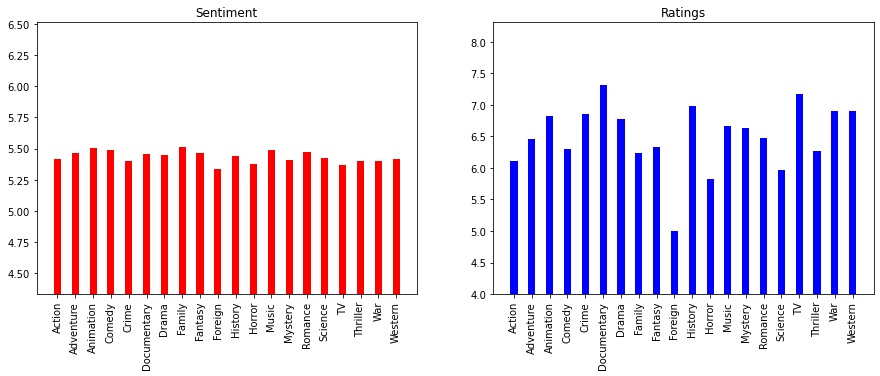

In [5]:
#Plot ratings and sentiment for the genre groupings
sentiment_dict = grouping(df,"TitleId","Avg sentiment movie") #Call grouping function the get dictionary of movie and average sentiment
rating_dict = grouping(df,"TitleId","Rating") #Call grouping function the get dictionary of movie and average rating

import numpy as np
 
genres = list(sentiment_dict.keys())
values = list(sentiment_dict.values())
ratings = list(rating_dict.values())
fig = plt.figure(figsize = (15, 5))


plt.subplot(1, 2, 1)
plt.title("Sentiment")
plt.xticks(rotation = 90)
plt.ylim(min(values)-1,max(values)+1)
plt.bar(genres, values, color ='red',
        width = 0.4)

plt.subplot(1, 2, 2)
plt.title("Ratings")
plt.xticks(rotation = 90)
plt.ylim(min(ratings)-1,max(ratings)+1)
plt.bar(genres, ratings, color ='blue',
        width = 0.4)
plt.show()

In [6]:
#Ensure sentiment and rating metrics are floats for the following plot

df["Avg sentiment movie"] = df["Avg sentiment movie"].astype(float)
df["Rating"] = df["Rating"].astype(float)

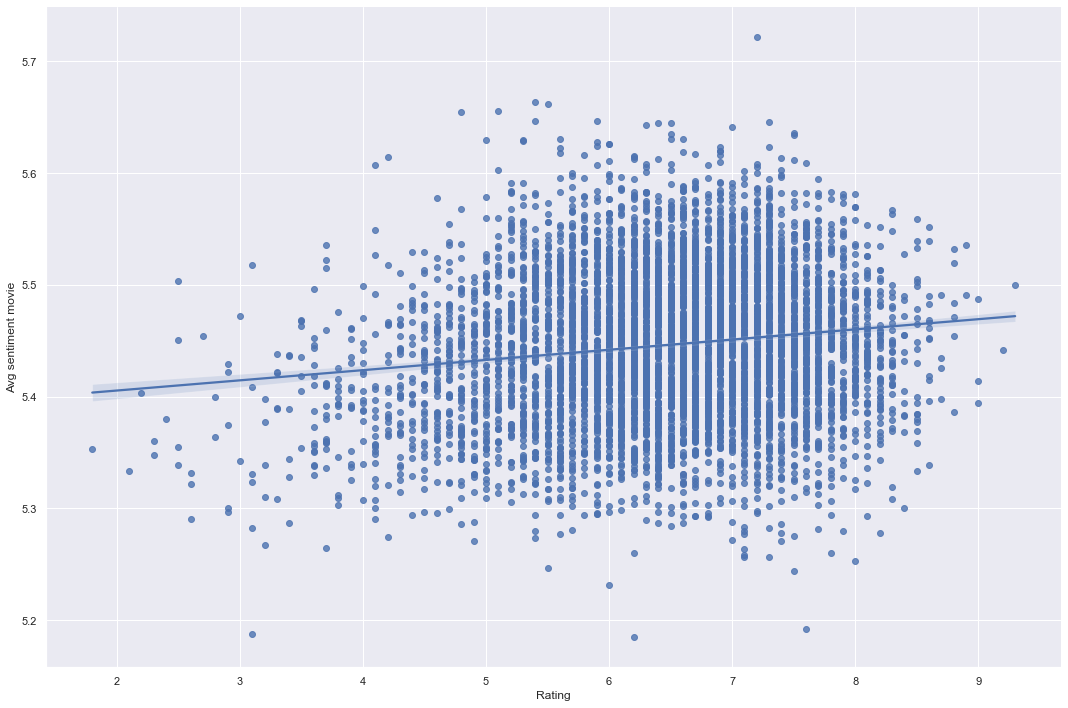

In [7]:
#Create sns plot to visualize correlation between rating and sentiment

import seaborn as sns
sns.set(rc={"figure.figsize":(15, 10)})
sns.lmplot(x="Rating", y="Avg sentiment movie", data=df,
              height=10, aspect=1.5);

In [8]:
# If r value (the first printet value) is more tan 0.95 there is substantial evidence for correlation
# Correlation metrics are calculated
from scipy import stats
print("For genres",stats.pearsonr(values, ratings))
print("All over",stats.pearsonr(df["Avg sentiment movie"], df["Rating"]))

For genres PearsonRResult(statistic=0.2968119806334321, pvalue=0.2038048037661557)
All over PearsonRResult(statistic=0.13845561835446488, pvalue=1.8523636262224843e-27)


In [9]:
print("REJECTED: Ratings and sentiment for the reviews have a correlation")

REJECTED: Ratings and sentiment for the reviews have a correlation


In [10]:
exploded_actors = df.explode('Actors').reset_index(drop=True) #Explode dataframe so that there is a row for each actor

In [11]:
exploded_actors

,TitleId,MovieTitle,Actors,Genres,Reviews,Rating,Review_tokens,Sentiment,Avg sentiment movie
0,0114709,Toy Story,Tom Hanks,Animation,[Andy's toys live a reasonable life of fun and...,8.3,"[[andy, s, toys, live, a, reasonable, life, of...","[2610, 868, 1292, 4159, 885, 455, 4124, 515, 3...",5.566495
1,0114709,Toy Story,Tim Allen,Animation,[Andy's toys live a reasonable life of fun and...,8.3,"[[andy, s, toys, live, a, reasonable, life, of...","[2610, 868, 1292, 4159, 885, 455, 4124, 515, 3...",5.566495
2,0114709,Toy Story,Don Rickles,Animation,[Andy's toys live a reasonable life of fun and...,8.3,"[[andy, s, toys, live, a, reasonable, life, of...","[2610, 868, 1292, 4159, 885, 455, 4124, 515, 3...",5.566495
3,0114709,Toy Story,Jim Varney,Animation,[Andy's toys live a reasonable life of fun and...,8.3,"[[andy, s, toys, live, a, reasonable, life, of...","[2610, 868, 1292, 4159, 885, 455, 4124, 515, 3...",5.566495
4,0114709,Toy Story,Wallace Shawn,Animation,[Andy's toys live a reasonable life of fun and...,8.3,"[[andy, s, toys, live, a, reasonable, life, of...","[2610, 868, 1292, 4159, 885, 455, 4124, 515, 3...",5.566495
...,...,...,...,...,...,...,...,...,...
258367,0323642,Piglet's Big Movie,Kath Soucie,Animation,[Piglet's Big Movie is a sweet children's movi...,6.1,"[[piglet, s, big, movie, is, a, sweet, childre...","[787, 640, 845, 432, 734, 767, 69, 754, 924, 8...",5.549387
258368,0323642,Piglet's Big Movie,Nikita Hopkins,Animation,[Piglet's Big Movie is a sweet children's movi...,6.1,"[[piglet, s, big, movie, is, a, sweet, childre...","[787, 640, 845, 432, 734, 767, 69, 754, 924, 8...",5.549387
258369,0323642,Piglet's Big Movie,Peter Cullen,Animation,[Piglet's Big Movie is a sweet children's movi...,6.1,"[[piglet, s, big, movie, is, a, sweet, childre...","[787, 640, 845, 432, 734, 767, 69, 754, 924, 8...",5.549387
258370,0323642,Piglet's Big Movie,Ken Sansom,Animation,[Piglet's Big Movie is a sweet children's movi...,6.1,"[[piglet, s, big, movie, is, a, sweet, childre...","[787, 640, 845, 432, 734, 767, 69, 754, 924, 8...",5.549387


In [12]:
def grouping_actors(df,cat1,cat2): #function for grouping actors and summing a metric such as rating for the grouping
    grouped_count = df.groupby(["Actors"])[cat1].count()
    grouped_rating = df.groupby(["Actors"])[cat2].sum()
    count_dict = {"Name":[],"Actors":[]}

    for name, genre in grouped_count.items():
        for name2, rating in grouped_rating.items():
            if name == name2 and name2:
                count_dict[name2]=rating/genre
    del count_dict["Actors"]
    del count_dict["Name"]

    return count_dict

In [13]:
sentiment_exploded_actors = grouping_actors(exploded_actors,"Actors","Avg sentiment movie") #Call grouping function the get dictionary of actors and average sentiment
rating_exploded_actors = grouping_actors(exploded_actors,"Actors","Rating") #Call grouping function the get dictionary of actors and rating

In [29]:
#Grouping such that each actor has a list with all the movies they appeared in and exported for unrelated analysis
grouped_count_act_mov = exploded_actors.groupby("Actors")["MovieTitle"].apply(list).to_frame(name = 'movies').reset_index()
grouped_count_act_mov.to_pickle("Actor_movie_grouping.pkl")
grouped_count_act_mov

,Actors,movies
0,A Enani,[Love & Basketball]
1,A Martinez,"[She-Devil, What's Cooking?, Change of Habit, ..."
2,AJ Carothers,[Hero at Large]
3,Aad Wirtz,[The Falls]
4,Aadil,[Gandhi]
...,...,...
132795,Zvonko Jovcic,[Kelly's Heroes]
132796,Zwi Kanar,[Train de vie]
132797,Zygmund Szarnicki,[Roommates]
132798,Zygmunt Kargol,[La Reine Margot]


In [30]:
#Showcase of extreme actors rating 
print(max(rating_exploded_actors, key=rating_exploded_actors.get),max(rating_exploded_actors.values()))
print(min(rating_exploded_actors, key=rating_exploded_actors.get),min(rating_exploded_actors.values()))
print(len(rating_exploded_actors.keys()))

Brad Pyner 9.3
Cassandra Bright 1.8
132800


In [31]:
#Read community dataframe from 'Bipartite Network' notebook

communities = pd.read_pickle(r"reviewsFromImdb/ActorCommunities.pkl")
len(communities)

23

In [32]:
#Function for getting a metric such as rating or sentiment from a cluster of actors 

def cluster_info(dictionary): 
    cluster_rank_list = []
    for com in communities:
        actor_rank_list = []
        for actor in com:
            if  isinstance(dictionary.get(actor), float):
                actor_rank_list.append(dictionary.get(actor))
        cluster_rank_list.append(sum(actor_rank_list)/len(actor_rank_list))
    return cluster_rank_list

In [33]:
cluster_rank = cluster_info(rating_exploded_actors) #Function call to get rank of all clusters
cluster_sentiment = cluster_info(sentiment_exploded_actors) #Function call to get sentiment of all clusters

In [34]:
#Normalize ranking and sentiment lists and combine them into a overall metric for how well an actor is received.
norm_cluster_rank = [float(i)/sum(cluster_rank) for i in cluster_rank]
norm_cluster_sentiment = [float(i)/sum(cluster_sentiment) for i in cluster_sentiment]
combined = [sum(value) for value in zip(norm_cluster_rank, norm_cluster_sentiment)]

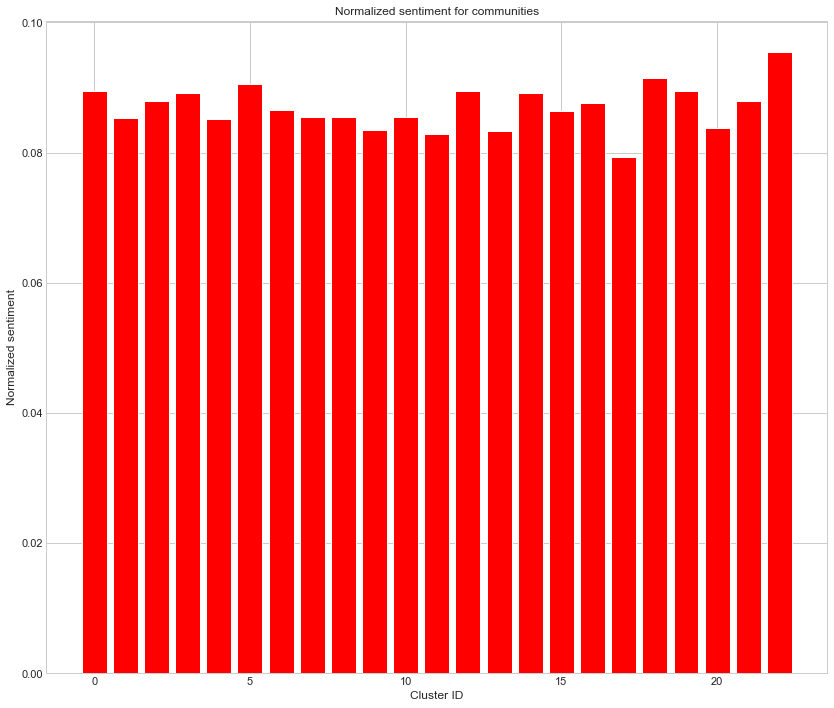

In [53]:
#Plot the metric from above for each of the clusters
plt.figure(figsize=(14,12)) 
plt.style.use('seaborn-whitegrid') 
plt.title("Normalized sentiment for communities")
plt.xticks(rotation = 0)
plt.ylabel("Normalized sentiment")
plt.xlabel("Cluster ID")
#plt.ylim(min(combined)-0.1,max(combined)+0.1)
plt.bar([x for x in range(len(communities))],combined, color ='red',
        width = 0.8)
plt.show()